In [176]:
import wandb
import torch
from vit_pytorch.efficient import ViT
from nystrom_attention import Nystromformer
from vit_pytorch import MAE
import torchvision 
from tqdm import tqdm
from torchvision import transforms

efficient_transformer = Nystromformer(
    dim = 128,
    depth = 6,
    heads = 4,
    num_landmarks = 256
)

v2 = ViT(
    dim = 128,
    image_size = 112,
    patch_size = 16,
    num_classes = 256,
    transformer = efficient_transformer
)
mae_nystrom = MAE(
    encoder = v2,
    masking_ratio = 0.75,   # the paper recommended 75% masked patches
    decoder_dim = 128,      # paper showed good results with just 512
    decoder_depth = 4       # anywhere from 1 to 8
)
from vit_pytorch import ViT as ViT2

# efficient_transformer = Nystromformer(
#     dim = 128,
#     depth = 6,
#     heads = 4,
#     num_landmarks = 256
# )

v = ViT2(
    image_size = 112,
    patch_size = 16,
    num_classes = 1000,
    dim = 256,
    depth = 6,
    heads = 8,
    mlp_dim = 512
)
mae = MAE(
    encoder = v,
    masking_ratio = 0.75,   # the paper recommended 75% masked patches
    decoder_dim = 128,      # paper showed good results with just 512
    decoder_depth = 4       # anywhere from 1 to 8
)

In [177]:
model = torch.load('trained-vit_9.pt')

In [178]:
sd = torch.load('trained-vit_9.pt')

In [179]:
from vit_pytorch.extractor import Extractor


In [180]:
mae.load_state_dict({k[len('module.'):]:v for k,v in sd.items()})

<All keys matched successfully>

In [181]:
v = Extractor(v)

In [182]:
img = torch.randn(1, 3, 112, 112)
logits, embeddings = v(img)

In [183]:
v = v.eject()

In [184]:
from vit_pytorch.recorder import Recorder
v = Recorder(v)

# forward pass now returns predictions and the attention maps

img = torch.randn(1, 3, 112, 112)
preds, attns = v(img)

In [185]:
v = v.eject()

In [186]:
attns.shape

torch.Size([1, 6, 8, 50, 50])

In [187]:
import matplotlib.pyplot as plt

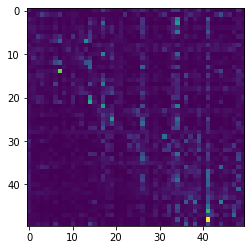

In [199]:
plt.imshow(attns[0][3][7])

In [204]:
preds.shape

torch.Size([1, 1000])

(array([ 13.,  42., 141., 199., 243., 185., 114.,  51.,   9.,   3.]),
 array([-1.562992  , -1.2055976 , -0.8482033 , -0.49080893, -0.13341458,
         0.22397977,  0.5813741 ,  0.93876845,  1.2961628 ,  1.6535572 ,
         2.0109515 ], dtype=float32),
 <BarContainer object of 10 artists>)

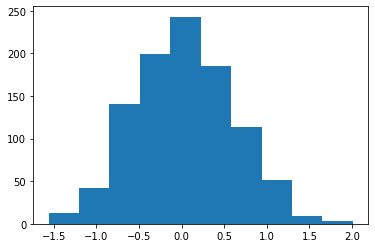

In [211]:
plt.hist(preds[0].detach().numpy())